In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import seaborn as sns

In [3]:
# Fuentes sacadas del INE
fuente_2 = "../../data/evolucion_del_precio_de_la_vivienda_en_madrid.csv"
df_2 = pd.read_csv(fuente_2, sep=";")
fuente_3 = "../../data/la_renta_bruta_media_de_madrid.csv"
df_3 = pd.read_csv(fuente_3, sep=";")
fuente_4 = "../../data/ipva_mad_tam.csv"
df_4 = pd.read_table(fuente_4, sep=";")
fuente_5 = "../../data/ipva_mad_vivienda.csv"
df_5 = pd.read_csv(fuente_5, sep=";")
fuente_6 = "../../data/ipva_mad_contrato.csv"
df_6 = pd.read_csv(fuente_6,  sep=";")


In [4]:
df_2

,Año,Periodo,Madrid﻿,España
0,2007,Trimestre 2,"3.497,8",NaN
1,2007,Trimestre 3,"3.551,19",NaN
2,2007,Trimestre 4,"3.364,98",NaN
3,2008,Trimestre 1,"3.323,59",NaN
4,2008,Trimestre 2,"3.268,73",NaN
...,...,...,...,...
263,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN
265,"Url:""https://www.epdata.es/comparacion-evoluci...",NaN,NaN,NaN
266,"Titulo:""Evolución del precio de la vivienda en...",NaN,NaN,NaN


In [5]:
df_2.head(248)

,Año,Periodo,Madrid﻿,España
0,2007,Trimestre 2,"3.497,8",NaN
1,2007,Trimestre 3,"3.551,19",NaN
2,2007,Trimestre 4,"3.364,98",NaN
3,2008,Trimestre 1,"3.323,59",NaN
4,2008,Trimestre 2,"3.268,73",NaN
...,...,...,...,...
243,2023,Junio,NaN,1.622
244,2023,Julio,NaN,1.617
245,NaN,NaN,NaN,NaN
246,NaN,NaN,NaN,NaN


In [6]:
df_2.columns = ["anno", "period", "madrid", "spain"]
df_2.drop(axis=1, columns="spain",inplace=True)
df_2.drop(axis=0, index=df_2.loc[245:].index,inplace=True )

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   anno    245 non-null    object
 1   period  245 non-null    object
 2   madrid  46 non-null     object
dtypes: object(3)
memory usage: 5.9+ KB


In [8]:
df_2["madrid"] = df_2["madrid"].str.replace(".", "")
df_2["madrid"] = df_2["madrid"].str.replace(",", ".")
df_2

,anno,period,madrid
0,2007,Trimestre 2,3497.8
1,2007,Trimestre 3,3551.19
2,2007,Trimestre 4,3364.98
3,2008,Trimestre 1,3323.59
4,2008,Trimestre 2,3268.73
...,...,...,...
240,2023,Marzo,NaN
241,2023,Abril,NaN
242,2023,Mayo,NaN
243,2023,Junio,NaN


In [9]:
df_2["madrid"] = pd.to_numeric(df_2["madrid"], errors="coerce")
df_2


,anno,period,madrid
0,2007,Trimestre 2,3497.80
1,2007,Trimestre 3,3551.19
2,2007,Trimestre 4,3364.98
3,2008,Trimestre 1,3323.59
4,2008,Trimestre 2,3268.73
...,...,...,...
240,2023,Marzo,NaN
241,2023,Abril,NaN
242,2023,Mayo,NaN
243,2023,Junio,NaN


In [10]:
df_2mean = df_2[df_2["madrid"].notna()].groupby("anno")["madrid"].describe()

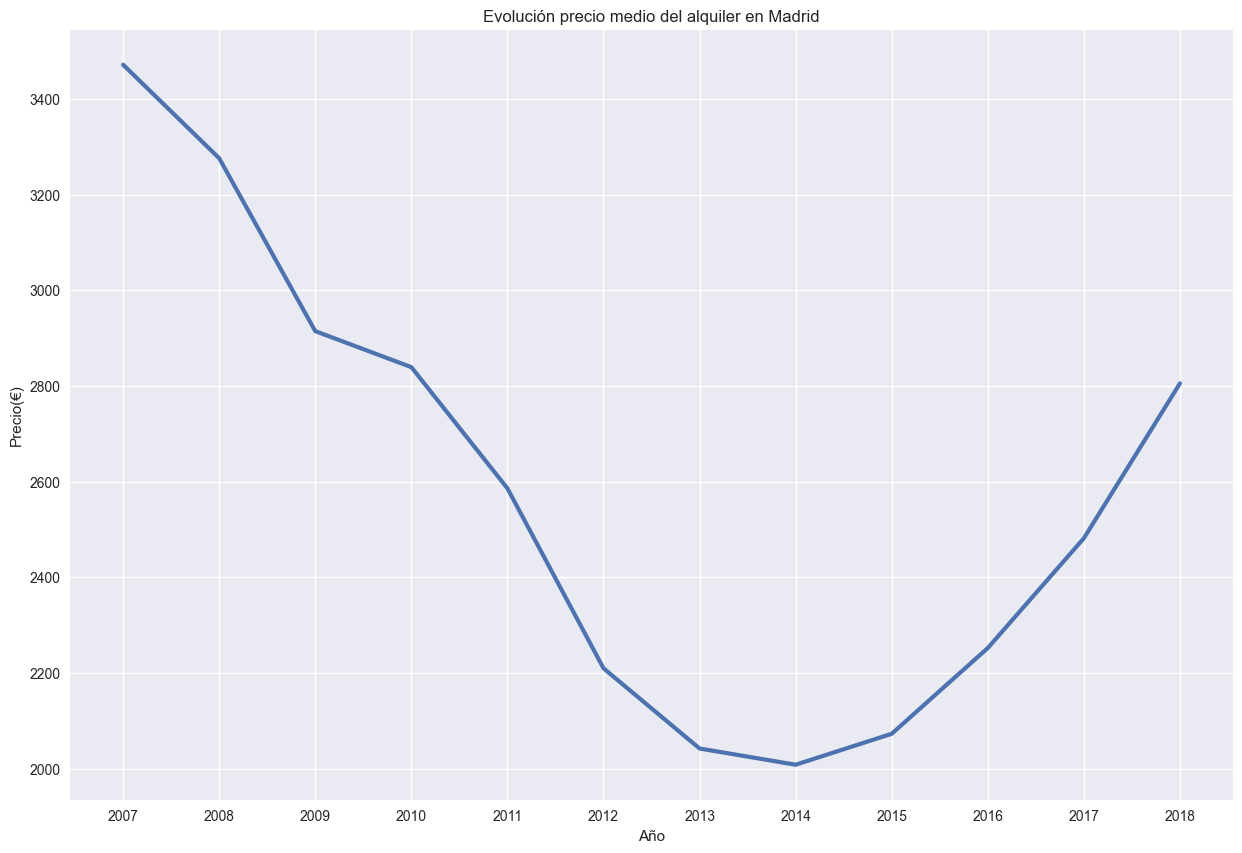

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_2mean,
             x="anno",
             y="mean",
            linewidth = 3);
plt.title("Evolución precio medio del alquiler en Madrid");
plt.xlabel("Año");
plt.ylabel("Precio(€)");

In [12]:
fuente_4 = "../../data/ipva_mad_tam.csv"
df_4 = pd.read_table(fuente_4, sep=";")
fuente_5 = "../../data/ipva_mad_vivienda.csv"
df_5 = pd.read_csv(fuente_5, sep=";")
fuente_6 = "../../data/ipva_mad_contrato.csv"
df_6 = pd.read_csv(fuente_6,  sep=";")

In [13]:
df_4.drop(axis=1,columns=["Total Nacional","Comunidades y Ciudades Autonomas","Tipo de dato"], inplace=True)
df_4

,Tamano de la vivienda,Periodo,Total
0,Total,2021,"112,539"
1,Total,2020,"111,433"
2,Total,2019,"110,717"
3,Total,2018,"106,485"
4,Total,2017,"103,653"
...,...,...,...
93,>150,2019,"2,2"
94,>150,2018,"1,9"
95,>150,2017,"1,8"
96,>150,2016,"1,1"


In [14]:
df_4["Total"] = df_4["Total"].str.replace(",", ".")
df_4["Total"] = df_4["Total"].to_numpy(dtype=np.float32)

In [15]:
df_4_mad = df_4.groupby(["Tamano de la vivienda",'Periodo']).sum()
df_4_mad.reset_index(inplace=True)
df_4_mad

,Tamano de la vivienda,Periodo,Total
0,(120-150],2015,100.500000
1,(120-150],2016,102.954002
2,(120-150],2017,104.709000
3,(120-150],2018,107.812004
4,(120-150],2019,111.470001
5,(120-150],2020,109.023994
6,(120-150],2021,111.085999
7,(60-75],2015,100.099998
8,(60-75],2016,103.772003
9,(60-75],2017,105.324997


Text(0.5, 1.0, 'Evolución tamaño de la vivienda en Madrid')

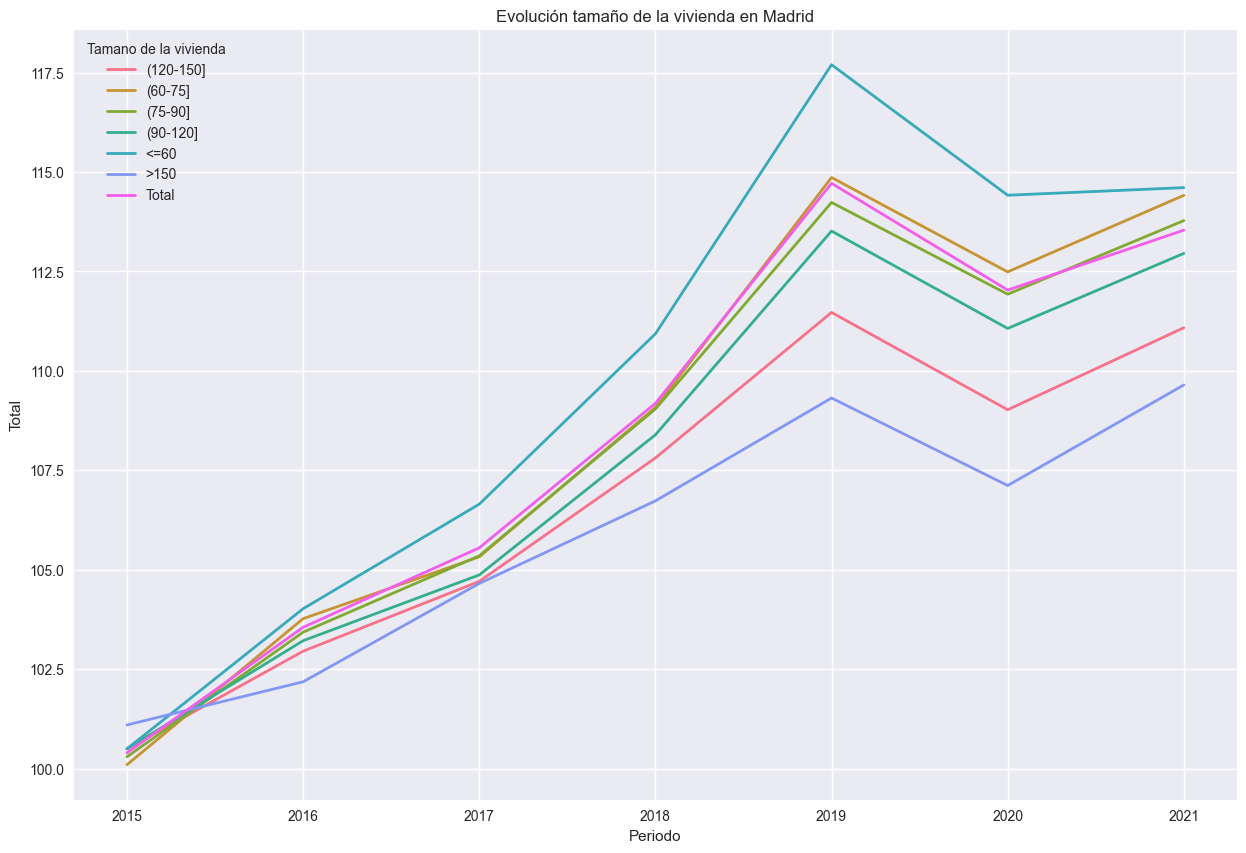

In [16]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_4_mad,
             x="Periodo",
             y="Total",
             hue="Tamano de la vivienda",
            linewidth = 2);
plt.title("Evolución tamaño de la vivienda en Madrid")

In [23]:
# Fuente media renta en madrid INE
fuente_8 = "../../data/salarioMedioMadrid.csv"
df_8 = pd.read_csv(fuente_8, sep=";")
df_8

,Tipo de jornada,Comunidades y Ciudades Autonomas,Decil,Periodo,Total
0,Jornada a tiempo completo,"13 Madrid, Comunidad de",Total decil,2021,"2.603,91"
1,Jornada a tiempo completo,"13 Madrid, Comunidad de",Total decil,2020,"2.579,09"
2,Jornada a tiempo completo,"13 Madrid, Comunidad de",Total decil,2019,"2.408,23"
3,Jornada a tiempo completo,"13 Madrid, Comunidad de",Total decil,2018,"2.510,81"
4,Jornada a tiempo completo,"13 Madrid, Comunidad de",Total decil,2017,"2.423,99"
5,Jornada a tiempo completo,"13 Madrid, Comunidad de",Total decil,2016,"2.408,42"
6,Jornada a tiempo completo,"13 Madrid, Comunidad de",Total decil,2015,"2.521,12"
7,Jornada a tiempo completo,"13 Madrid, Comunidad de",Total decil,2014,"2.544,10"
8,Jornada a tiempo completo,"13 Madrid, Comunidad de",Total decil,2013,"2.475,85"
9,Jornada a tiempo completo,"13 Madrid, Comunidad de",Total decil,2012,"2.372,43"
